# Imports

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

data = pd.read_csv("data/health_nutrition.csv")

# EDA

In [34]:
# Print column names to inspect
print("Column names in the dataset:")
print(data.columns)

Column names in the dataset:
Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', 'Unnamed: 60'],
      dtype='object')


# Regions and Indicators of Interest

In [16]:
# Define regions
balkans = ['Albania', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Greece',
           'Montenegro', 'North Macedonia', 'Romania', 'Serbia', 'Slovenia', 'Kosovo']
baltics = ['Estonia', 'Latvia', 'Lithuania']

regions = {
    'Balkans': balkans,
    'Baltics': baltics
}

hiv_code = 'Adults (ages 15+) and children (0-14 years) living with HIV'

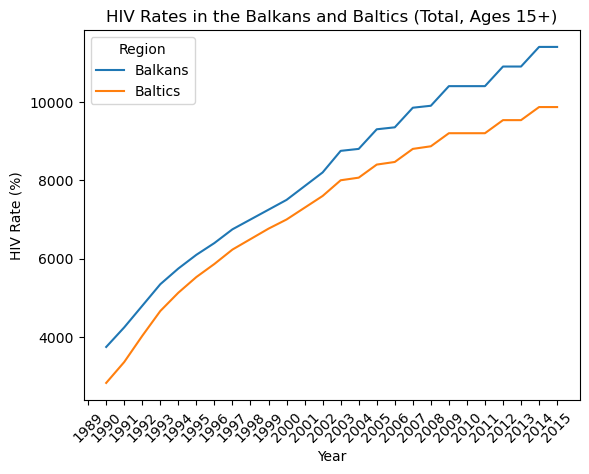

In [56]:
# Create an empty dictionary to store results
mapToMeanValues = {}

# Loop through each region
for region in regions:
    countries = regions[region]

    #Append rows where 'Country Name' matches the countries list
    regional_data_list = []

    for country in countries:
        country_data = data[data['Country Name'] == country]
        regional_data_list.append(country_data)

    # Concatenate all data frames in the list
    regional_data = pd.concat(regional_data_list)

    # Filter rows where 'Indicator Name' is the HIV name
    regional_data = regional_data[regional_data['Indicator Name'] == hiv_code]

    # Drop unnecessary columns
    regional_data = regional_data.drop(columns=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', 'Unnamed: 60'])

    # Calculate the mean values for each year
    mean_values = regional_data.mean()
    mapToMeanValues[region] = mean_values

# Plot each region's data
for region in regions:
    mean_values = mapToMeanValues[region]
    plt.plot(mean_values.index, mean_values, label=region)

plt.title('HIV Rates in the Balkans and Baltics (Total, Ages 15+)')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.ylabel('HIV Rate (%)')
plt.legend(title='Region')
plt.show()